## Изучение данных

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px

In [3]:
sns.set(color_codes=True)

In [4]:
df = pd.read_csv('games.csv')

Выведем на экран первые десять строк таблицы:

In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим общую информацию о таблице:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице одиннадцать столбцов.

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

В каждой строке таблицы — данные о компьютерных играх. Предварительно можно утверждать, что данных достаточно для проведения исследования. Но в данных встречаются пропуски, а также заметны проблемы с типами данных. При этом в названиях колонок присутствуют расхождения с хорошим стилем. Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

### Замена названий столбцов

In [7]:
df.columns = df.columns.str.lower() # приведем к нижнему регистру названия стобцов

In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

Названия столбцов были приведены к нижнему регистру методом `str.lower()`.

### Замена типа данных

In [9]:
df['year_of_release'] = df['year_of_release'].astype('Int64') # изменение типа данных в столбце year_of_release

In [10]:
df['user_score'].value_counts() # перед изменением типа данных в столбце user_score учтем, что в столбце есть значение 'tbd'

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') # изменение типа данных в столбце user_score

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Вывод**

Для дальнейшего использования в исследовании и удобства тип данных в столбце `year_of_release` был изменен на целочисленный  методом astype() (был выбран именно тип 'Int64', так как он умеет хранить пропуски). В столбце `user_score` тип данных был переведен из строкового типа str в вещественный тип float методом pd.to_numeric(), но при этом был задан параметр errors 'coerce', чтобы некорректные значения принудительно заменились на NaN, в том числе значение 'tbd'. Аббревиатура TBD используется в том числе и сфере компьютерных игр, расшифровываясь как 'будет определено', то есть в нашем случае это означает, что оценка пользователей не сформирована.

### Обработка пропусков

In [13]:
df.isna().mean() # оценим долевое соотношение пропусков

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [14]:
df['rating'] = df['rating'].fillna('undefined') # заполним пропуски в столбце rating на 'undefined'

In [15]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.000000
dtype: float64

**Вывод**

В столбцах `name`, `year_of_release`, `genre` пропущено  менее 1% значений, поэтому ими можно пренебречь. В столбце `user_score` значение 'tbd' были заменены на NaN, поэтому пропущенных значений стало больше. На мой взгляд, пропущенные значения в столбцах `critic_score`, `user_score` лучше оставить как есть, так как точно заменить данные пропуски нет возможности. Если их заполнить медианными значениями или средними, то в дальнейшем в результате анализа и проверки гипотез можно прийти к неправильным выводам. Вариант с удалением данных с пропусками тоже не рассматривается, потому что убирая данные с пропусками, удаляются и значения из других столбцов, что приводит к потере части информации. Опять же, если в столбцах `critic_score`, `user_score` заменить пропуски 'заглушкой', то она испортит исходное распределение. 

Пропущенные значения в столбце `rating` были заменены на значение 'undefined'.

Возможной причиной пропусков в столбцах `critic_score`, `user_score`, `rating` является то, что источник, откуда были получены данные, не содержал всю информацию, соответственно неизвестно по каким параметрам подгружались данные.

### Расчёты

In [16]:
# посчитаем суммарные продажи во всех регионах
df['total_sales'] = (df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Вывод**

В отдельный столбец `total sales` таблицы были добавлены суммарные продажи во всех регионах.

## Исследовательский анализ данных

### Проверим, сколько игр выпускалось в разные годы.

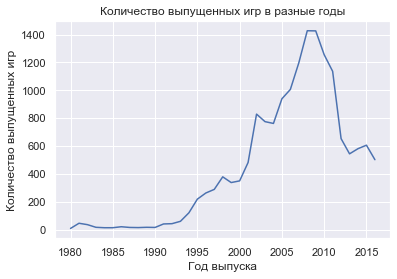

In [18]:
df.groupby('year_of_release')['name'].count().plot(grid = True) # сгруппируем данные и построим график
plt.title('Количество выпущенных игр в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

**Вывод**

Судя по графику, для анализа важны данные после начала 2000-х годов, когда количество игр начало быстро расти.

### Проанализируем, как менялись продажи по платформам.

In [19]:
# сгруппируем данные, чтобы определить платформы с наибольшими суммарными продажами
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10) 

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [20]:
df_top_platforms = df[df['platform'].isin(('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'))].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

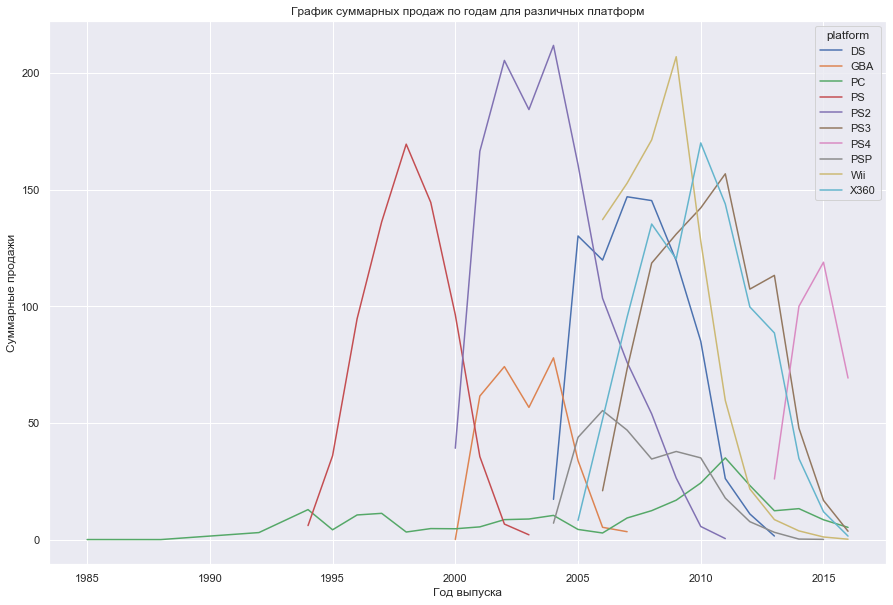

In [21]:
df_top_platforms.plot(kind='line', grid = True, legend=True, figsize=(15,10)) # построим график
plt.title('График суммарных продаж по годам для различных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод**

Если не учитывать платформу PC (на данную платформу регулярно выходят игры, поэтому и график суммарных продаж не прерывается) и платформу PS4, которая возникла относительно недавно (в рамках данных проекта), характерным сроком появления новых и исчезновения старых платформ является срок около 10 лет. Отметим, что происходит смена поколений, и лидеры по сумме уже не являются перспективными платформами на 2016 год.

### Определим актуальный период для построения прогноза на 2017 год.

In [22]:
df_actual = df[df['year_of_release'] >= 2012].reset_index(drop=True) # выделим актуальный период

**Вывод**

Так как характерный срок жизни платформы составляет около 10 лет, то можно предположить, что в период до 5 лет платформы показывают наибольшие суммарные продажи. Поэтому, в результате исследования предыдущих вопросов, определим **актуальный период с 2012 по 2016**.

### Выделим платформы, которые лидируют по продажам, растут или падают.

In [23]:
# сгруппируем данные, чтобы определить платформы с наибольшими суммарными продажами для актуального периода
df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64

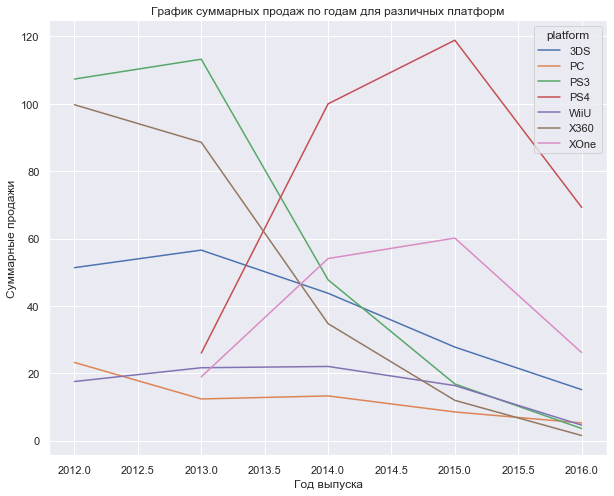

In [24]:
df_actual[df_actual['platform'].isin(('PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC'))].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line', grid = True, legend=True, figsize=(10, 8))
plt.title('График суммарных продаж по годам для различных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод**

В актуальный период (с 2012 по 2016) платформы PS4, PS3 и X360 лидируют по продажам. При этом, если рассматривать тренд, то суммарные продажи в разбивке по платформам падают. Однако, до 2015 года лидеры по продажам PS4 и XOne показывали рост, поэтому их можно отнести к потенциально прибыльным платформам. В этот же список внесем платформу 3DS (суммарные продажи в последние годы больше, чем у остальных платформ, за исключением PS4 и XOne) и PC (опять же, на данную платформу стабильно выходят игры, и в перспективе суммарные продажи данной платформы выше, чем у WiiU, PS3, X360).

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по выбранным потенциально прибыльным платформам.

In [25]:
# выделим потенциально прибыльные платформы по предыдущему пункту
df_actual_potential_profitable = df_actual[df_actual['platform'].isin(('PS4', 'XOne', '3DS', 'PC'))]

In [26]:
df_actual_potential_profitable['total_sales'].describe()

count    1285.000000
mean        0.568654
std         1.293477
min         0.010000
25%         0.040000
50%         0.140000
75%         0.470000
max        14.630000
Name: total_sales, dtype: float64

(0, 2)

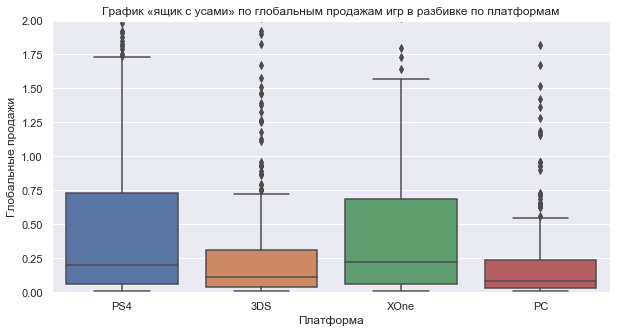

In [27]:
plt.figure(figsize = (10, 5)) 
sns.boxplot(data = df_actual_potential_profitable, x = 'platform', y = 'total_sales')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 2)

**Вывод**

График «ящик с усами» показал, что медиана суммарных продаж для всех рассматриваемых платформ разная. При этом, отметим, что для каждой платформы в среднем характерно до 250 тыс. проданных копий. Также видно, что в рамках платформ много выбросов, но это, судя по всему, игры бестселлеры.

### Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Влияние отзывов пользователей и критиков на продажи рассмотрим на примере платформы PS4.

In [28]:
# выделим платформу PS4
df_actual_potential_profitable_PS4 = df_actual_potential_profitable.query('platform == "PS4"')

In [29]:
# посчитаем коэффициент корреляции продажами и отзывами пользователей
df_actual_potential_profitable_PS4['total_sales'].corr(df_actual_potential_profitable_PS4['user_score'])

-0.031957110204556424

In [30]:
# посчитаем коэффициент корреляции продажами и отзывами критиков
df_actual_potential_profitable_PS4['total_sales'].corr(df_actual_potential_profitable_PS4['critic_score'])

0.406567902061781

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


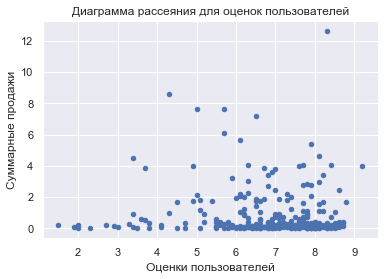

In [31]:
df_actual_potential_profitable_PS4.plot(x='user_score', y='total_sales', kind='scatter') # построим диаграмму рассеяния
plt.title('Диаграмма рассеяния для оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


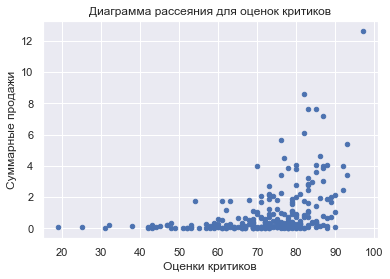

In [32]:
df_actual_potential_profitable_PS4.plot(x='critic_score', y='total_sales', kind='scatter') # построим диаграмму рассеяния
plt.title('Диаграмма рассеяния для оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод**

Изучив данные, можно прийти к выводу, что между продажами и оценками критиков наблюдается умеренная положительная корреляция (0.40), то есть отзывы критиков влияют на продажи. При этом между продажами и оценками пользователей нет взаимосвязи, судя по коэффициенту корреляции (-0.03).

### Соотнесем выводы с продажами игр на других платформах.

Соотнесем выводы предыдущего пункта с продажами игр на платформах XOne, 3DS, PC.

In [33]:
# посмотрим коэффициенты корреляции для перспективных платформ
display(df_actual_potential_profitable.pivot_table(index = 'platform', values = ['critic_score', 'user_score', 'total_sales'], \
                                                  aggfunc = 'corr')[['total_sales']])

total_sales
platform                          
3DS      critic_score     0.320803
         user_score       0.197583
         total_sales      1.000000
PC       critic_score     0.237243
         user_score      -0.121867
         total_sales      1.000000
PS4      critic_score     0.406568
         user_score      -0.031957
         total_sales      1.000000
XOne     critic_score     0.416998
         user_score      -0.068925
         total_sales      1.000000

In [34]:
# отобразим на графике
scores = ['critic_score', 'user_score']

for score in scores:
    
    fig = px.scatter(df_actual_potential_profitable.dropna(), x = score, y = 'total_sales', color = 'platform', title = 'Корреляция продаж и ' + score)
    fig.show("notebook_connected")

**Вывод**

Для платформ XOne, 3DS, PC аналогичен вывод о том, что отзывы критиков положительно влияют на продажи. Однако, есть некоторые различия. В случае платформы 3DS присутствует слабая корреляция между продажами и отзывами пользователей (0.19), а платформа PC выделяется тем, что между продажами и оценками пользователей есть слабая отрицательная корреляция (-0.12). Таким образом, в большинстве случаев оценки критиков в лучшей степени коррелируют с продажами, нежели оценки пользователей.

### Общее распределение игр по жанрам.

Изучим распределение игр по жанрам в акутальный период по выбранным потенциально прибыльным платформам.

In [35]:
# сгруппируем данные по жанрам
df_actual_potential_profitable.groupby('genre')['total_sales'].agg(['count', 'sum']).sort_values('sum',ascending=False)

,count,sum
genre,,
Action,451,192.04
Shooter,122,163.29
Role-Playing,171,132.49
Sports,113,89.84
Simulation,53,31.07
Platform,39,27.87
Misc,85,25.80
Racing,60,23.44
Fighting,37,19.68


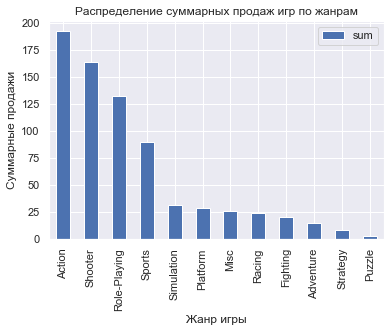

In [36]:
df_actual_potential_profitable.groupby('genre')['total_sales'].agg(['count', 'sum']).sort_values('sum',ascending=False).plot(kind='bar', y = 'sum', grid = True)
plt.title('Распределение суммарных продаж игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод**

В рамках выборки самыми прибыльными жанрами являются Action, Shooter и Role-Playing, а самые низкие продажи среди игр с жанрами Strategy и Puzzle.

## Составление портрета пользователя каждого региона

### Cамые популярные платформы (топ-5).

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [37]:
# определим самые популярные платформы в регионе NA
df_actual_na = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
df_actual_na['percentage'] = round(df_actual_na['na_sales'] / df_actual_na['na_sales'].sum(), 2)
display(df_actual_na)

,na_sales,percentage
platform,,
X360,140.05,0.28
PS4,108.74,0.22
PS3,103.38,0.21
XOne,93.12,0.19
3DS,55.31,0.11


In [38]:
# определим самые популярные платформы в регионе EU
df_actual_eu = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
df_actual_eu['percentage'] = round(df_actual_eu['eu_sales'] / df_actual_eu['eu_sales'].sum(), 2)
display(df_actual_eu)

,eu_sales,percentage
platform,,
PS4,141.09,0.34
PS3,106.86,0.26
X360,74.52,0.18
XOne,51.59,0.12
3DS,42.64,0.10


In [39]:
# определим самые популярные платформы в регионе JP
df_actual_jp = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
df_actual_jp['percentage'] = round(df_actual_jp['jp_sales'] / df_actual_jp['jp_sales'].sum(), 2)
display(df_actual_jp)

,jp_sales,percentage
platform,,
3DS,87.79,0.51
PS3,35.29,0.20
PSV,21.04,0.12
PS4,15.96,0.09
WiiU,13.01,0.08


### Самые популярные жанры (топ-5).

Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5).

In [40]:
# определим самые популярные жанры в регионе NA
df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [41]:
# определим самые популярные жанры в регионе EU
df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [42]:
# определим самые популярные жанры в регионе JP
df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


### Влияние рейтинга ESRB на продажи.

Определим влияние рейтинга ESRB на продажи в каждом регионе (NA, EU, JP).

In [43]:
# определим влияние рейтинга ESRB в регионе NA
df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

,na_sales
rating,
M,231.57
E,114.37
undefined,103.31
E10+,75.70
T,66.02


In [44]:
# определим влияние рейтинга ESRB в регионе EU
df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)

,eu_sales
rating,
M,193.96
E,113.03
undefined,91.50
E10+,55.37
T,52.96


In [45]:
# определим влияние рейтинга ESRB в регионе JP
df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

,jp_sales
rating,
undefined,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


**Вывод**

Согласно изученным данным можно прийти к следующим вывода:
- В Северной Америке и в Европе наиболее популярные платформы одинаковые: X360, PS4, PS3, XOne, 3DS. При этом в Северной Америке платформа X360 занимает большую долю, чем в Европе, и находится на первом месте. В Японии ситуация сильно различается: наибольшую долю занимает платформа 3DS, PS4 лишь только на четвертой строчке, а в список топ-5 входят также платформы PSV и WiiU.

- В Северной Америке и в Европе наиболее популярными жанрами являются (топ-4): Action, Shooter, Sports и Role-Playing. Пятое место В Северной Америке занимает жанр Misc, а в Европе - Racing. Опять же, в Японии список наиболее популярных жанров отличается. В большей степени это обусловлено различиями в сформировавшейся культуре. В Японии наиболее популярным жанром является не Action, а Role-Playing, а замыкают топ-5 жанры Simulation	и Fighting.

- Что касается влияния рейтинга ESRB на продажи, то в Северной Америке и Европе оно не различается. Самыми популярными являются игры с рейтингом M, то есть для возрастной категории старше 17 лет. Отдельно отметим, что игры со значением 'undefined' (без рейтинга) занимают в Северной Америке и Европе третью строчку в продаже игр, а в Японии и вовсе первую (со значительным отрывом). Для Японии характерно, что для игр, у которых есть рейтинг ESRB, продажи игр с рейтингами E, T и M находятся примерно на одинаковом уровне.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу H₀ и альтернативную гипотезу H₁:

- нулевая гипотеза H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны;
- альтернативная гипотеза H₁ - средние пользовательские рейтинги платформ Xbox One и PC различаются.

Зададим пороговое значение alpha = 0.05

In [46]:
df_actual_xone = df_actual.query('platform == "XOne"') # выделим платформу Xbox One

In [47]:
df_actual_pc = df_actual.query('platform == "PC"') # выделим платформу Xbox PC

In [48]:
alpha = 0.05

# проверим гипотезу о равенстве средних двух совокупностей

results_1 = st.ttest_ind(df_actual_xone['user_score'], df_actual_pc['user_score'], equal_var = False, nan_policy = 'omit')

print('p-значение:', results_1.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости

if results_1.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134426
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Для проверки гипотез был использован двусторонний критерий, так как в данном случае гипотеза предполагает возможность отклонения наблюдаемого значения (пользовательского рейтинга) от предполагаемого в обе стороны.

Так как p-value больше заданного уровня статистической значимости, то нулевая гипотеза H₀ (средние пользовательские рейтинги платформ Xbox One и PC равны) **не отвергается**. Таким образом, по всей видимости, средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу H₀ и альтернативную гипотезу H₁:

- нулевая гипотеза H₀ - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны;
- альтернативная гипотеза H₁ - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

Зададим пороговое значение alpha = 0.05

In [49]:
df_actual_action = df_actual.query('genre == "Action"') # выделим жанр Action

In [50]:
df_actual_sports = df_actual.query('genre == "Sports"') # выделим жанр Sports

In [51]:
alpha = 0.05 

# проверим гипотезу о равенстве средних двух совокупностей

results_2 = st.ttest_ind(df_actual_action['user_score'], df_actual_sports['user_score'], equal_var = False, nan_policy = 'omit') 

print('p-значение:', results_2.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости

if results_2.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2430777657264175e-20
Отвергаем нулевую гипотезу


**Вывод**

Для проверки гипотез был использован двусторонний критерий, так как в данном случае гипотеза предполагает возможность отклонения наблюдаемого значения (пользовательского рейтинга) от предполагаемого в обе стороны.

Так как p-value меньше заданного уровня статистической значимости, то нулевая гипотеза H₀(средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны) **отвергается**. Следовательно, по всей видимости, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

## Общий вывод

Для ответа на вопросы исследования была изучена таблица с данными, проведена подготовка данных, а также посчитаны суммарные продажи во всех регионах.

**В результате анализа было установлено:**

1. В соответствии с выбранным актуальным периодом (с 2012 по 2016) и составлении прогноза на 2017 год к наиболее потенциально прибыльным платформам относятся PS4, XOne, 3DS и PC. Если ориентироваться на Северную Америку и Евпропу, то следует отдать предпочтение играм на платформах PS4 и XOne. В случае с Японией наиболее популярной платформой для игр выступает 3DS.


2. В целом для платформ PS4, XOne, 3DS, PC наибольшее умеренное влияние на продажи оказывают оценки критиков, а не отзывы пользователей.


3. В Северной Америке и в Европе наиболее популярные жанры это - Action, Shooter, Sports и Role-Playing. В Японии таким жанром является Role-Playing, а в топ-5 также входят Misc, Simulation и Fighting.


4. Рейтинг ESRB по-своему влияет на продажи: в Северной Америке и Европе cамыми популярными являются игры с рейтингом M, а в Японии продажи игр без рейтинга занимают первую строчку, в то время, как продажи игр с рейтингами E, T, M в данном регионе находятся гораздо ниже и занимают примерно одинаковой уровень.


5. Проверка гипотез предположительно показала, что, во-первых, средние пользовательские рейтинги платформ Xbox One и PC не отличаются, а, во-вторых, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.


**Данные результаты исследования, которые выявили закономерности определяющие успешность игр, могут быть учтены интернет-магазином «Стримчик» для выбора потенциально популярных продуктов и планировании рекламных кампаний.**